<a href="https://colab.research.google.com/github/cp20790/Dissertation/blob/main/Motor_imagery_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 DATA DESCRIPTION

The goal of this data set was to illustrate the rate of data categorization in iot_device_test Data resulting from signal processing in Mortor imaging using iot_device_test csv file.

dividing the ATLAS dataset that contained Magnetic resonance imaging (MRI) which is a medical imaging method used in radiology to create images of the body's architecture and physiological processes. MRI scanners generate images of the organs in the body by using powerful magnetic fields, magnetic field gradients, and radio waves.

additional validations on external datasets of chronic stroke magnetic resonance imaging scans are required to establish the generalizability of the segmentation performance of the dataset.


The dataset will be used to define the data result definition, which will take into account three parameters measurements.



Firstly, the degree to which the outcome remains constant throughout the data analysis is referred to as reliability.

Data on this is collected using statistics such as kappa and their inter-class correlation and intra-class correlation, respectively.



2.Validity - this refers to the degree to which a measure assesses what it is meant to measure, and it includes the reliability of the measure.

validity on the surface (degree to which user or expert understands that a measure is assessing what it is intended to measure),

legitimacy of the material (the extent to which a measure accurately and comprehensively measures what it is intended to measure),

as well as construct validity (the degree to which an instrument properly assesses a nonphysical feature or concept such as a construct validity

In addition, sadness or anxiety might serve as a technique of summarizing or explaining distinct elements of the thing being measured.



3.Variability - refers to the distribution of values associated with an outcome measure in a population of interest, with the mean being the mean of the distribution of values.

a more diverse distribution or range of values that is considered to have greater variability so that can take in an image, assign importance (learnable weights and biases) to distinct aspects/objects in the image, and distinguish one from the other. When compared to other classification methods, the amount of pre-processing required by a ConvNet is significantly less. While filters in primitive approaches are hand-engineered, ConvNets can learn these filters/characteristics with adequate training.







Algorithm



In the field of predictive modeling, linear regression is one of the most often utilized approaches.



An equation Y = a+bX + e may be used to express this relationship, in which a denotes the intercept, b represents the slope of the line, and e is the error term. It is possible to use this equation to forecast the value of a target variable based on the value of a predictor variable (s).


# DATA UNDERSTANDING

In [ ]:
# libraries importation

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore

In [ ]:
# variable assignment and data reading
data = 'iot_device_test.csv'
data = pd.read_csv(data)

In [ ]:
data.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'device_category'],
      dtype='object', length=298)

columns in EEG_Clean_Data

In [ ]:
# data type description
data.dtypes

ack                          int64
ack_A                        int64
ack_B                        int64
bytes                        int64
bytes_A                      int64
                             ...  
suffix_is_googleapis.com     int64
suffix_is_net                int64
suffix_is_org                int64
suffix_is_unresolved         int64
device_category             object
Length: 298, dtype: object

In [ ]:
data.apply(lambda x: len(x.unique()))
#display the unique values

ack                         134
ack_A                        97
ack_B                       102
bytes                       401
bytes_A                     258
                           ... 
suffix_is_googleapis.com      1
suffix_is_net                 1
suffix_is_org                 1
suffix_is_unresolved          2
device_category               9
Length: 298, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 298 entries, ack to device_category
dtypes: float64(123), int64(174), object(1)
memory usage: 2.0+ MB


more information for gun violence data for each column and the attribute

DATA QUALITY

In [ ]:
print("the total rows :",len(data))

the total rows : 900


total rows of the iot_device_test data

In [ ]:
print("Total number of columns:",len(data.columns))

Total number of columns: 298


In [ ]:
# print both rows and columns

print("rows and columns :",data.shape)

rows and columns : (900, 298)


In [ ]:
print("Duplicated columns :",data.duplicated().sum())

Duplicated columns : 18


In [ ]:
# missing values
data.isna().sum()

ack                         0
ack_A                       0
ack_B                       0
bytes                       0
bytes_A                     0
                           ..
suffix_is_googleapis.com    0
suffix_is_net               0
suffix_is_org               0
suffix_is_unresolved        0
device_category             0
Length: 298, dtype: int64

There is no data duplicate.

incase of duplicate run :
    
    data.drop_duplicates()
    


STATISTICS

In [ ]:
data['ack'].value_counts()

0        200
24        66
38        61
14        52
1         47
        ... 
89         1
216        1
92         1
99         1
10180      1
Name: ack, Length: 134, dtype: int64

In [ ]:
data['ack_A'].value_counts()

0        213
12       103
20        79
6         47
7         47
        ... 
39265      1
46         1
2092       1
41         1
27         1
Name: ack_A, Length: 97, dtype: int64

Data cleaning

In [ ]:
data.head(10)

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor
5,40,20,20,14818,7934,1.152527,6884,0,0,2.6469,...,0,0,0,1,0,0,0,0,0,baby_monitor
6,1,0,1,208,74,0.552235,134,0,0,0.2437,...,0,0,0,1,0,0,0,0,0,baby_monitor
7,38,20,18,14714,7814,1.132464,6900,0,0,1.9104,...,0,0,0,1,0,0,0,0,0,baby_monitor
8,41,20,21,14894,7994,1.158551,6900,0,0,2.0504,...,0,0,0,1,0,0,0,0,0,baby_monitor
9,38,20,18,14730,7814,1.129844,6916,0,0,1.9449,...,0,0,0,1,0,0,0,0,0,baby_monitor


In [ ]:
data = 'EEG_Clean_Data.csv'
data = pd.read_csv(data)


In [ ]:
# drop nan values
data = data.dropna()

### DATA PREPROCESSING 
An improvement in the accuracy and reliability of the model might be achieved by data preprocessing. However, when we are cognizant of the features and apply the appropriate input, we may be able to achieve some objectives more quickly and efficiently. Although I experimented with several data mining approaches, such as transformation and normalization, I ultimately opted to stick with binning and produced a new dataframe named df_train below

In [ ]:
# data = data[data.columns[0:5]]

In [ ]:
data.describe()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,...,EEG _entropy().1,EEG _mean().2,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,state,subject
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9.742000e+03,9742.000000,9742.000000,9742.000000,9742.000000,...,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,49.241710,295.587689,343.231317,505.529871,-503.623999,2.398388e+07,526.397018,5.116119,1760.970647,3932.927117,...,4.283873,34.813053,300.699405,267.735395,674.846468,-647.880528,360.870425,4.930832,0.404845,2.018066
std,38.223876,169.460790,192.227469,245.636041,311.910165,2.247790e+07,313.853300,0.075125,945.188146,2126.527087,...,0.161942,27.057895,166.164376,162.535599,329.341130,405.786094,210.348426,0.132325,0.490887,1.409663
min,-384.815000,18.220867,20.756431,-18.000000,-2048.000000,1.757440e+05,27.250000,1.382603,227.336213,336.302670,...,0.461368,-273.070497,29.423901,16.773729,33.941125,-2896.309376,22.273864,0.736067,0.000000,0.000000
25%,41.880000,192.234805,234.251151,353.000000,-743.000000,7.936293e+06,351.250000,5.088626,1151.805410,2565.401461,...,4.193544,29.410339,195.939657,169.309830,474.645427,-952.296058,231.931024,4.931767,0.000000,1.000000
50%,49.390000,267.748566,344.705016,505.000000,-425.000000,1.490363e+07,470.750000,5.135806,1704.452661,3490.082241,...,4.303921,34.938146,270.624859,241.646538,659.023520,-545.886435,296.631295,4.985553,0.000000,2.000000
75%,56.678750,436.757096,513.721669,688.000000,-328.000000,3.885157e+07,790.000000,5.156964,2534.339893,5691.912332,...,4.390913,40.262660,438.834741,397.327713,914.996175,-417.193001,548.007755,5.003716,1.000000,3.000000
max,630.265000,1289.697303,1667.186195,2047.000000,194.000000,3.363288e+08,2399.250000,5.253676,6231.930604,17346.809698,...,4.812922,445.236856,1293.332000,757.438715,2894.895162,-5.656854,1005.152289,5.080047,1.000000,4.000000


Exploration

Histogram

<AxesSubplot:ylabel='Frequency'>

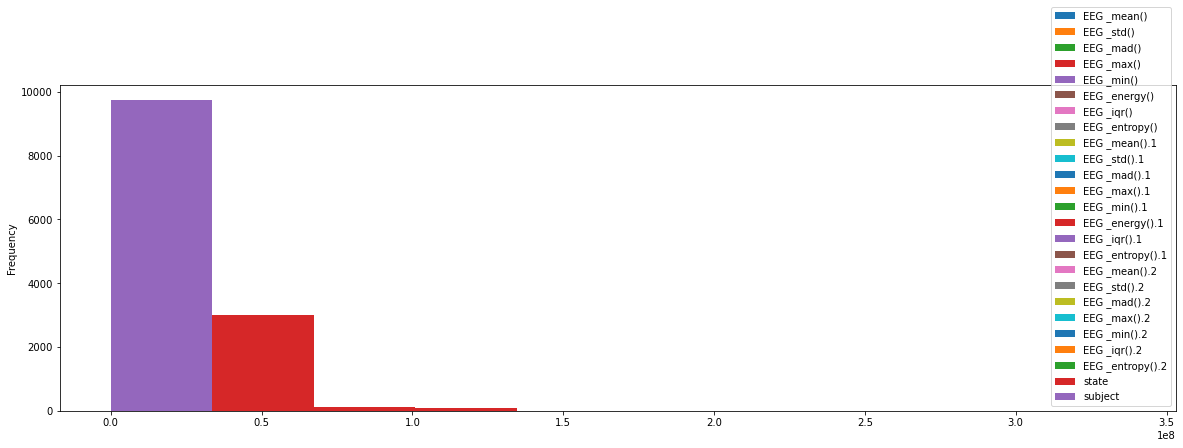

In [ ]:
data.plot(kind="hist",figsize=(20,6))

 Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [ ]:
df_train = pd.read_csv('EEG_Clean_Data.csv')
df_test = pd.read_csv('iot_device_test.csv')
df_train.head()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,...,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,EEG _skewness().1,EEG _kurtosis().1,state,subject
0,52.430,258.690733,330.620295,556,-587,13933960,438.00,5.075521,2165.547123,3040.454844,...,261.268170,253.702656,657.609307,-781.352993,268.700577,4.978994,[0.23563205],[0.25675342],0,0
1,61.125,552.757053,661.981891,950,-982,61855325,940.00,5.118838,3342.727579,7119.093856,...,554.300509,495.873373,1155.412480,-1288.348555,654.604103,5.004412,[-0.09053293],[-0.24383106],1,1
2,42.820,254.083781,303.192154,451,-475,13278424,468.50,5.150551,1821.133173,3156.247450,...,256.271441,229.590420,607.404725,-531.744299,312.364421,4.990480,[0.04465197],[-0.45158065],0,2
3,36.405,55.646572,58.562788,212,-135,884373,76.25,5.015599,537.079691,771.957515,...,61.646015,31.974922,275.771645,-140.007143,67.528698,4.749479,[0.76360157],[1.45863391],1,3
4,39.090,328.835281,372.874458,504,-643,21932134,595.00,5.168024,1841.607707,4305.881449,...,330.086042,322.370110,685.186471,-831.557575,428.329933,4.965934,[-0.25973714],[-0.30126909],0,4


In [ ]:
df_train.describe()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,...,EEG _entropy().1,EEG _mean().2,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,state,subject
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9.742000e+03,9742.000000,9742.000000,9742.000000,9742.000000,...,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,49.241710,295.587689,343.231317,505.529871,-503.623999,2.398388e+07,526.397018,5.116119,1760.970647,3932.927117,...,4.283873,34.813053,300.699405,267.735395,674.846468,-647.880528,360.870425,4.930832,0.404845,2.018066
std,38.223876,169.460790,192.227469,245.636041,311.910165,2.247790e+07,313.853300,0.075125,945.188146,2126.527087,...,0.161942,27.057895,166.164376,162.535599,329.341130,405.786094,210.348426,0.132325,0.490887,1.409663
min,-384.815000,18.220867,20.756431,-18.000000,-2048.000000,1.757440e+05,27.250000,1.382603,227.336213,336.302670,...,0.461368,-273.070497,29.423901,16.773729,33.941125,-2896.309376,22.273864,0.736067,0.000000,0.000000
25%,41.880000,192.234805,234.251151,353.000000,-743.000000,7.936293e+06,351.250000,5.088626,1151.805410,2565.401461,...,4.193544,29.410339,195.939657,169.309830,474.645427,-952.296058,231.931024,4.931767,0.000000,1.000000
50%,49.390000,267.748566,344.705016,505.000000,-425.000000,1.490363e+07,470.750000,5.135806,1704.452661,3490.082241,...,4.303921,34.938146,270.624859,241.646538,659.023520,-545.886435,296.631295,4.985553,0.000000,2.000000
75%,56.678750,436.757096,513.721669,688.000000,-328.000000,3.885157e+07,790.000000,5.156964,2534.339893,5691.912332,...,4.390913,40.262660,438.834741,397.327713,914.996175,-417.193001,548.007755,5.003716,1.000000,3.000000
max,630.265000,1289.697303,1667.186195,2047.000000,194.000000,3.363288e+08,2399.250000,5.253676,6231.930604,17346.809698,...,4.812922,445.236856,1293.332000,757.438715,2894.895162,-5.656854,1005.152289,5.080047,1.000000,4.000000


In [ ]:
df_train.apply(lambda x: len(x.unique()))

EEG _mean()          6302
EEG _std()           9742
EEG _mad()           1094
EEG _max()            762
EEG _min()            878
EEG _energy()        9738
EEG _iqr()           2863
EEG _entropy()       9742
EEG _mean().1        9742
EEG _std().1         9742
EEG _mad().1         9742
EEG _max().1         9602
EEG _min().1         9135
EEG _energy().1      9739
EEG _iqr().1         9742
EEG _entropy().1     9742
EEG _skewness()      9742
EEG _kurtosis()      9742
EEG _mean().2        6014
EEG _std().2         9742
EEG _mad().2         1984
EEG _max().2         1533
EEG _min().2         1601
EEG _iqr().2         4043
EEG _entropy().2     9742
EEG _skewness().1    9742
EEG _kurtosis().1    9742
state                   2
subject                 5
dtype: int64

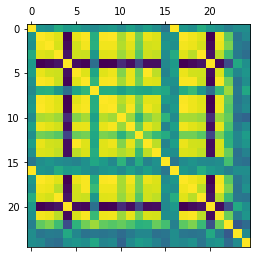

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

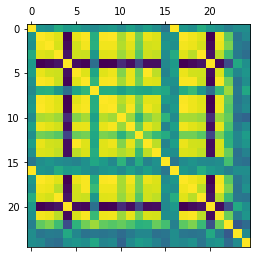

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
plt.show()

In [ ]:
df_test

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,264,116,148,212053,202036,20.169310,10017,0,0,250.1856,...,0,0,0,0,1,0,0,0,0,watch
896,24,13,11,7749,5364,2.249056,2385,0,0,300.6818,...,0,0,0,1,0,0,0,0,0,watch
897,20,9,11,7091,5336,3.040454,1755,0,0,300.9433,...,0,0,0,1,0,0,0,0,0,watch
898,30,14,16,7882,5789,2.765885,2093,0,0,244.8219,...,0,0,0,0,1,0,0,0,0,watch


In [ ]:
# variable assignment and data reading
data = 'iot_device_test.csv'
data = pd.read_csv(data)

<AxesSubplot:title={'center':'Test set device categroy'}, xlabel='device_category', ylabel='count'>

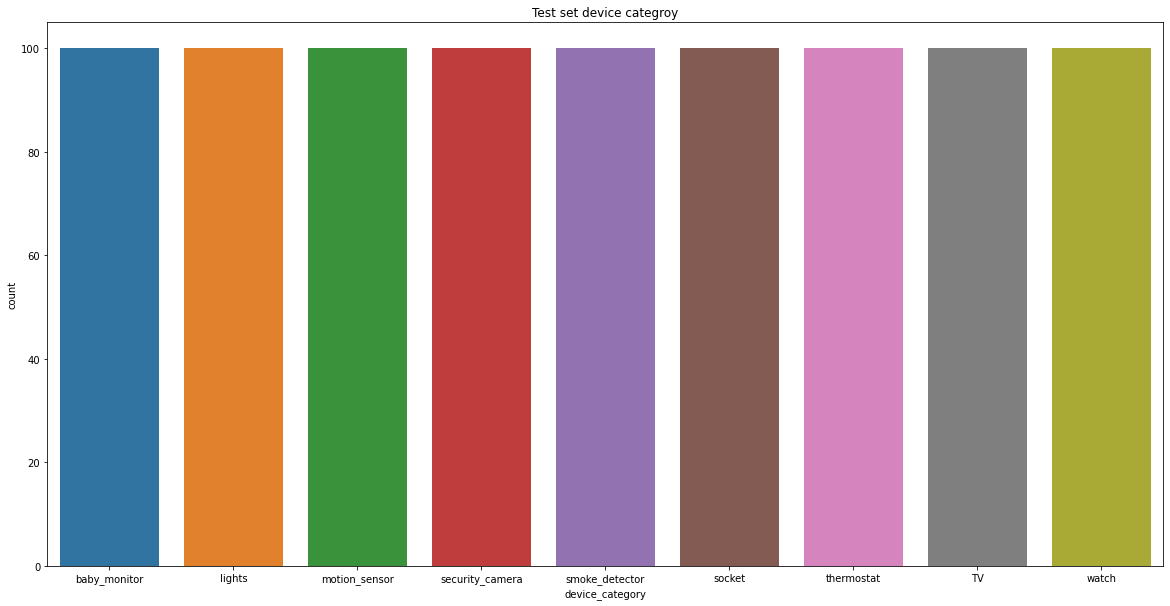

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Test set device categroy")
sns.countplot(data=data, x='device_category')

<AxesSubplot:title={'center':'Training set device categroy'}, xlabel='device_category', ylabel='count'>

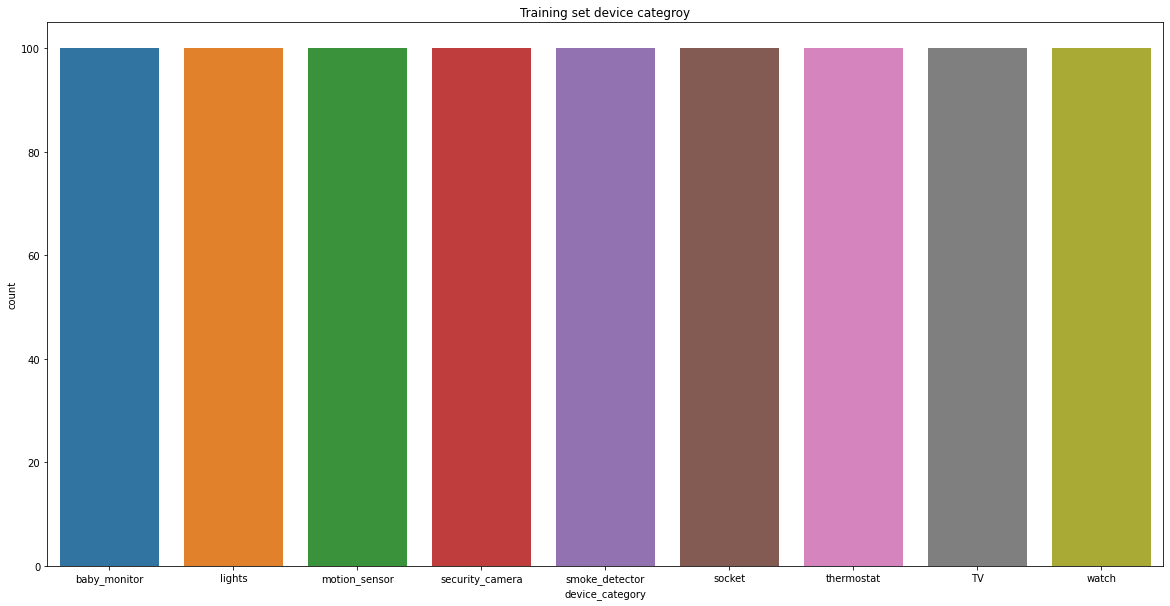

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.title("Training set device categroy")
sns.countplot(data=data, x='device_category')

In [ ]:
X = data.drop('device_category', axis=1)
y = data['device_category']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
         }

baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
baseline_model_scores

,Score
KNeighborsClassifier,0.855556
SVC,0.862963
LogisticRegression,0.900000
DecisionTreeClassifier,0.900000
RandomForestClassifier,0.933333


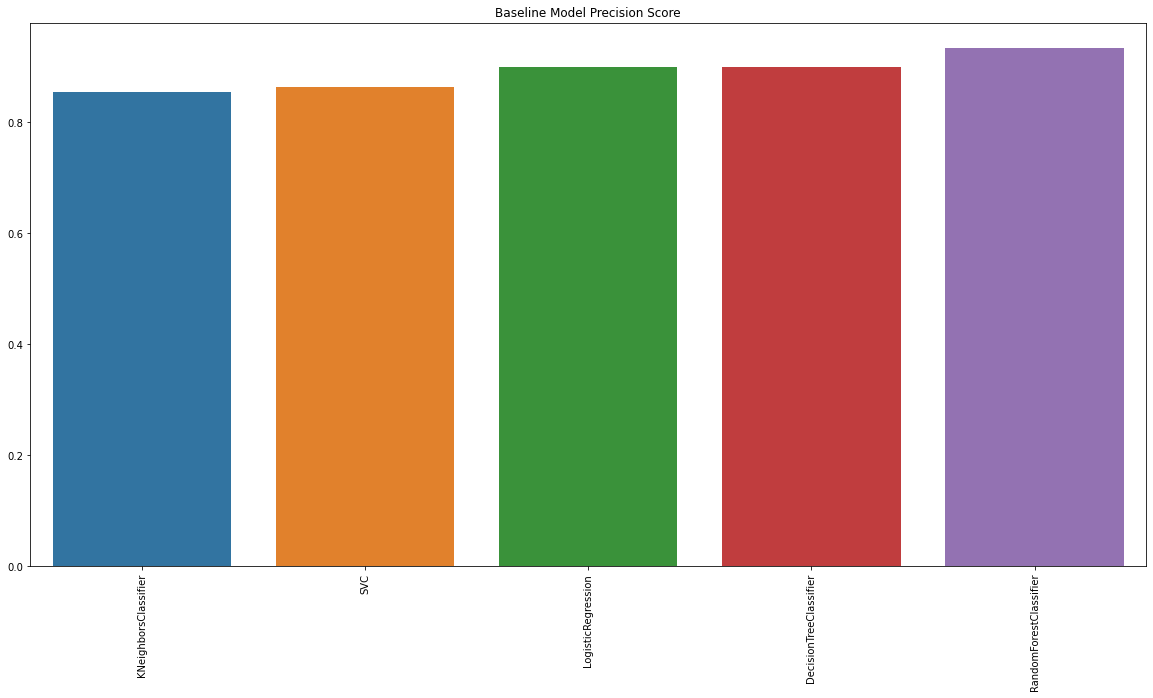

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

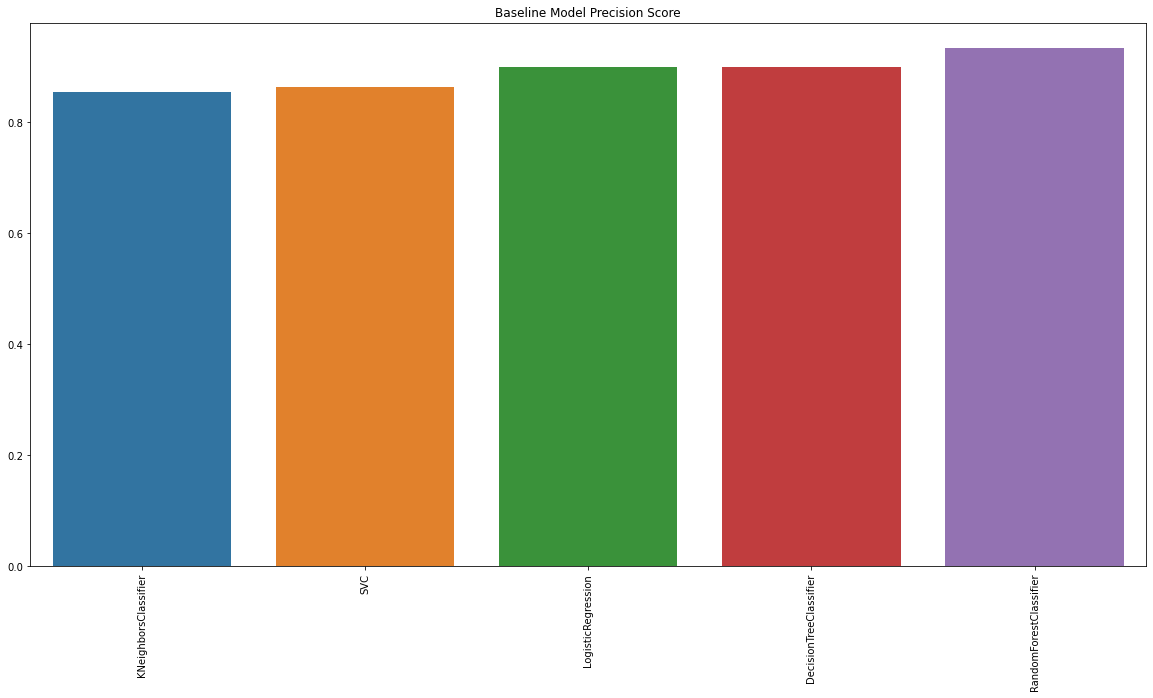

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

In [ ]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                      cv=5,
                                     n_iter=20,n_jobs=1,
                                     verbose=0)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

<AxesSubplot:>

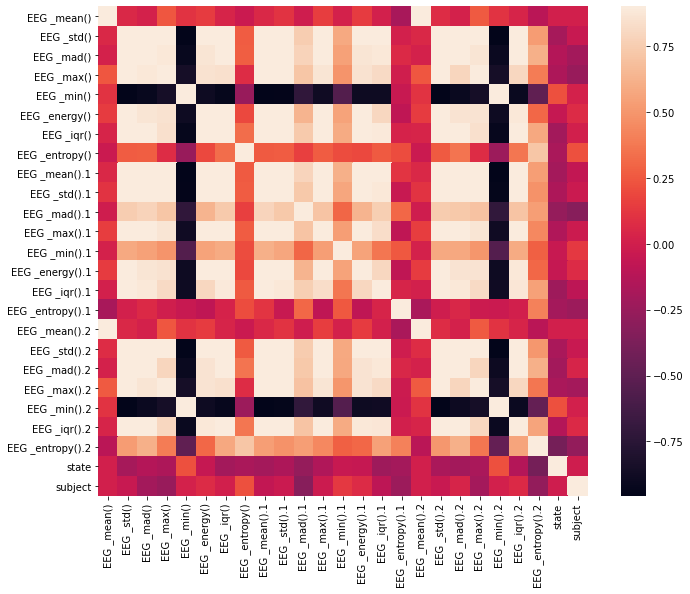

In [ ]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

<AxesSubplot:>

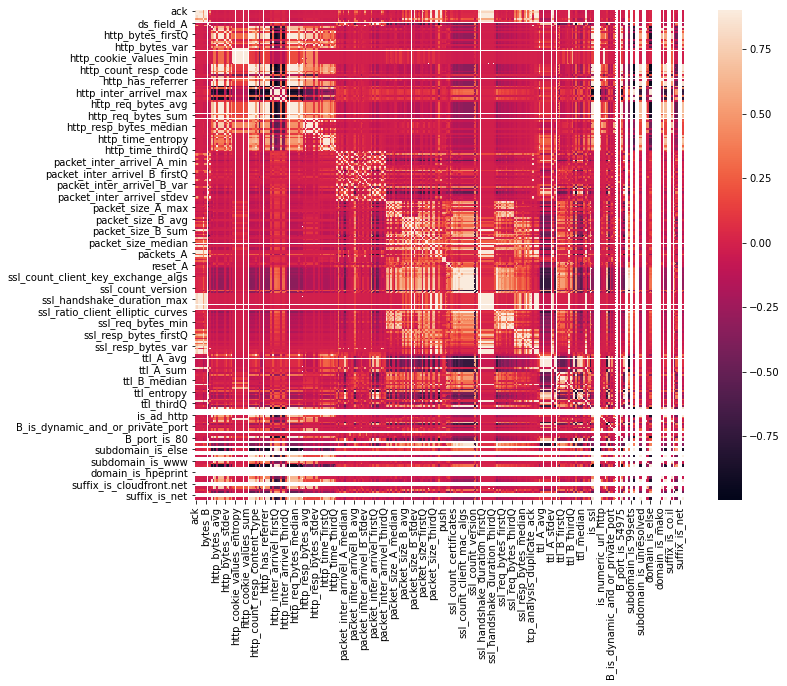

In [ ]:
corrmat = df_test.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

**Developa technique for  cross-validation**

Sklearn's cross val score function is used in this example. Due to the fact that this function does not include a shuffle attribute, we must add one line of code in order to shuffle the dataset prior to doing cross-validation on it.

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
#Validation function
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data.values)
    rmse= np.sqrt(-cross_val_score(models, data.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:

kf = KFold(n_splits=10)
kf


KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

**Regularization**

In order to solve the issues of overfitting and underfitting, regularization has been developed. Overfitting is characterized by a high level of variance, which is typically generated by a sophisticated function that generates a large number of superfluous curves and angles that are unrelated to the data. This function fits the training data well, however it may produce poor results when applied to the test data. Underfitting, on the other hand, results in a model with a low variance and is relatively basic. This might potentially lead to less-than-satisfactory results. Possible treatments include manually tweaking characteristics or employing some model selection algorithms, both of which entail more strain. When we use regularization, on the other hand, all of the characteristics are retained and the model is adjusted by j. This is especially effective when we have a large number of somewhat helpful attributes. Ridge and Lasso Regressions are two extensively used regularization types, and in this part, I will demonstrate how to apply them.

### When to employ a lasso or a ridge regression method:


Many small/medium sized effects: use ridge. <br>
Only a few variables with medium/large effect: use lasso



In [ ]:
print(np.unique(data.ack_A))

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    33    34    36    37    41
    45    46    49    52    53    55    57    59    61    62    63    64
    65    66    79    85    92   102   103   108   109   110   111   112
   113   114   115   116   117   123   147   151   164   176   211   233
   276   372   386   415   442   493   611   778   944  1426  1576  1956
  2049  2092  2324  2935  4956  5090 10267 10520 10829 12353 12358 12359
 39265]
